In [1]:
import networkx as nx
import numpy as np
from collections import Counter, OrderedDict
import matplotlib as mpl
mpl.use('nbagg')
import matplotlib.pyplot as plt

from matplotlib import patches
from matplotlib.path import Path
from tqdm import tqdm
import os
import json
import glob
import seaborn.apionly as sns
from scipy.stats import zscore, pearsonr, histogram2, mannwhitneyu, ttest_ind

# from ipyparallel import Client
# RC = Client()[:]
# len(RC)

plt.style.use('fivethirtyeight')

In [88]:
def arc_view(graph):
    def calc_loop_size(u, v):
        return 

    def prep_data(G):
        data = []
        occupied_pos = {}
        for i in G.edges_iter(data=True):
            if 'weight' in i[2]:
                weight = i[2]['weight']
            else:
                weight = 0.02
            if 'color' in i[2]:
                color = i[2]['color']
            else:
                color = 'k'
            us = int(i[0].split('-')[0].split('*')[0])
            vs = int(i[1].split('-')[0].split('*')[0])
            length = vs-(us + 2)-1
            inv_len = 51-length
            sig = str(us)+'_'+str(vs)
            if sig not in occupied_pos:
                occupied_pos[sig] = -3
            occupied_pos[sig] += 3
            inv_len += occupied_pos[sig]
            data.append([
                us, vs, 2*inv_len*3, weight*10, color
            ])
        data = np.array(data, dtype=object)
        data = data[data[:,0].argsort()]
        return data
    
    def make_arc(start, stop, height, weight, color):
        verts = [
            (start, 0.0),
            ((start + stop) / 2.0, 2.0 * height),
            (stop, 0.0)
        ]
        codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, lw=weight, alpha=0.3,
                                  edgecolor=color, facecolor='none')
        return patch

    
    def show_image(arcs_data):
        fig, ax = plt.subplots(1, 1, figsize=(6, 1))
        for ad in arcs_data:
            ax.add_patch(make_arc(ad[0], ad[1], (ad[2]), ad[3], ad[4]))
        
        ax.set_xlim((-1, arcs_data.T[1].max()+1))
        ax.set_ylim(-10, arcs_data[:, 2].max()+10)
        
        for i in ['top', 'bottom', 'left', 'right']:
            ax.spines[i].set_visible(False)
        ax.set_yticks([])
        ax.xaxis.set_ticks_position('bottom')
        ax.grid(which='major', linestyle='--', alpha=0.6)
        plt.show()
    
    arcs_info = prep_data(graph)
    show_image(arcs_info)
    return True

In [93]:
def quad_to_graph(graph_file, scores_file):
    G = nx.read_graphml(graph_file)
    g = graph_file.split('/')[-1].split('.')[0]
    data = json.load(open(scores_file))
    quads, scores, alts = data[g]
    arc_view(G)
    quad_G = nx.DiGraph()
    colours = ['red', 'blue', 'green']
    c = 0
    stars = 0
    for i in range(len(quads)):
        quad_G.add_edge(quads[i][0]+'*'*stars, quads[i][1]+'*'*stars,
                        weight=scores[i]*2, color=colours[c])
        quad_G.add_edge(quads[i][1]+'*'*stars, quads[i][2]+'*'*stars,
                        weight=scores[i]*2, color=colours[c])
        quad_G.add_edge(quads[i][2]+'*'*stars, quads[i][3]+'*'*stars,
                        weight=scores[i]*2, color=colours[c])
        stars+=1
        c+=1
        if c == len(colours):
            c = 0
    arc_view(quad_G)
    return quads, scores, alts

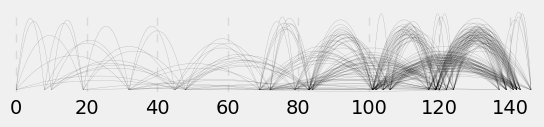

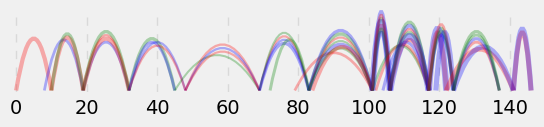

In [94]:
quads, scores, alts = quad_to_graph('./data/quad_graphs_mll50/chr1/positive/10000000/ 11960.graphml',
                 './data/quad_scores/chr1/positive/1000000.json')